In [ ]:
#Group Nickname: Powerpuff Girls
#090200148 Melik Kaan Şelale
#090200158 Elif Dila Türkmenoğlu
#090200107 Tunahan Akgül

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from GaussianNB_pp import GaussianNB_pp
from os import sys

In [2]:
# Load breast cancer data using load_breast_cancer and inspect it.
cancer = load_breast_cancer()

In [3]:
# Get the data and target
X, y = cancer.data,cancer.target

# Get feature names
feature_names =cancer.feature_names
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
df_cancer = pd.DataFrame(X,columns=feature_names)

<Axes: >

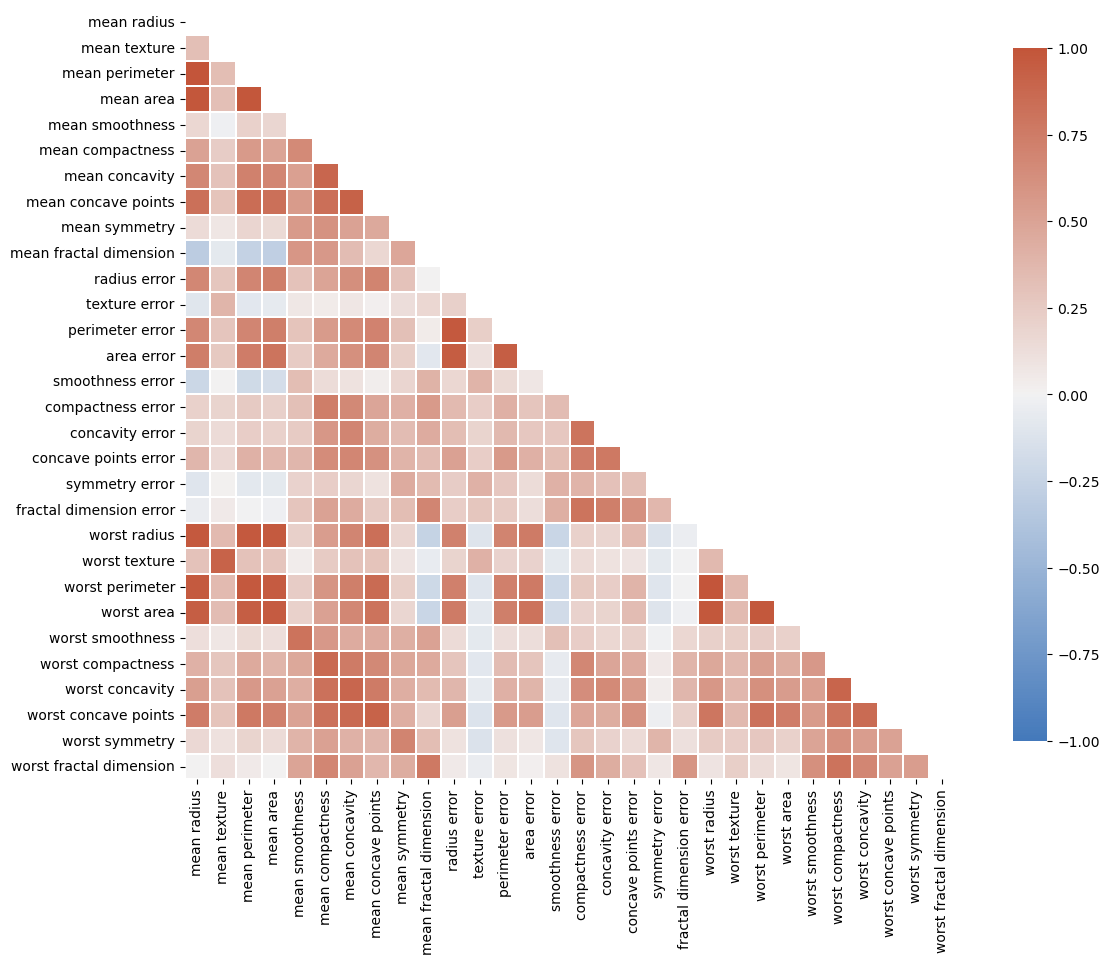

In [5]:
# Compute pairwise correlation of features.
corr =df_cancer.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1 ,vmax=1, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .9})

# We cannot use all of the features. Since the main assumption of Naive Bayes neglect the correlations of parameters with each other, we need to choose parameters that are not correlated with each other

In [6]:
#Find the parameters correlated between 0.1 and -0.1
pair_corr=[]
for k in range(len(corr.iloc[:])):
  for kk in range(len(corr.iloc[:])):
    if corr.iloc[k,kk]<0.1 and corr.iloc[k,kk]>-0.1  and kk>k:
      pair_corr.append((k,kk))
pair_corr

[(0, 11),
 (0, 19),
 (0, 29),
 (1, 4),
 (1, 8),
 (1, 9),
 (1, 14),
 (1, 18),
 (1, 19),
 (1, 24),
 (2, 11),
 (2, 18),
 (2, 19),
 (2, 29),
 (3, 11),
 (3, 18),
 (3, 19),
 (3, 29),
 (4, 11),
 (4, 21),
 (5, 11),
 (6, 11),
 (6, 14),
 (7, 11),
 (7, 14),
 (7, 18),
 (8, 21),
 (9, 10),
 (9, 12),
 (9, 13),
 (9, 21),
 (10, 28),
 (10, 29),
 (11, 23),
 (11, 24),
 (11, 25),
 (11, 26),
 (11, 29),
 (12, 29),
 (13, 14),
 (13, 28),
 (13, 29),
 (14, 21),
 (14, 25),
 (14, 26),
 (17, 21),
 (18, 21),
 (18, 24),
 (18, 25),
 (18, 26),
 (18, 27),
 (18, 29),
 (19, 20),
 (19, 21),
 (19, 22),
 (19, 23),
 (20, 29),
 (23, 29)]

In [7]:
# Your selected features
selected_features=['mean area','symmetry error','worst fractal dimension','smoothness error']
X=df_cancer[selected_features].values
# Labels of your selected features
y=y

In [11]:
# Split the data using train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,train_size=0.75)

In [12]:
clf = GaussianNB_pp()
clf.fit(X_train , y_train)
predictions = clf.predict(X_test)
print("Accuracy score of our model:", accuracy_score(y_test , predictions))

Accuracy score of our model: 0.916083916083916


In [13]:
clf2=GaussianNB()
clf2.fit(X_train , y_train)
predictions2 = clf2.predict(X_test)
print("Accuracy score of Sklearn's model:", accuracy_score(y_test , predictions2))

Accuracy score of Sklearn's model: 0.9370629370629371
